In [97]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc

In [98]:
def iF(x):
    if x >= 1 or x <= 0:
    #if x <= 0:    
        return 0
    else:
        return (math.log2(1 - x))**2

In [99]:
def Gen(count):
    np.random.seed()
    X = np.random.uniform(0,1,count)
    y = np.zeros([X.shape[0]])
    for i in range(X.shape[0]):
        y[i] = iF(X[i])
    return y

(array([881.,  69.,  24.,  12.,   4.,   5.,   2.,   0.,   0.,   3.]),
 array([8.38988603e-07, 8.69670004e+00, 1.73933992e+01, 2.60900984e+01,
        3.47867976e+01, 4.34834968e+01, 5.21801960e+01, 6.08768952e+01,
        6.95735944e+01, 7.82702936e+01, 8.69669928e+01]),
 <a list of 10 Patch objects>)

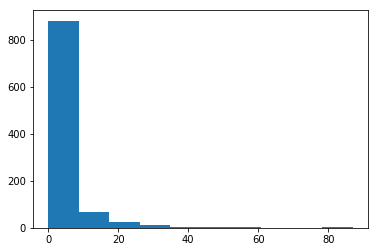

In [100]:
plt.hist(x = Gen(1000), bins = 10)

In [101]:
def Check(count):
    y = Gen(count)
    ym = y.mean()
    ys = y.std()**2 * y.shape[0] / (y.shape[0]  - 1)
    t = sc.t.ppf(0.975, count - 1)
    lhv = ym - t * (math.sqrt(ys)/math.sqrt(count))
    rhv = ym + t * (math.sqrt(ys)/math.sqrt(count))
    #print("count = ", count , "t = ", t)
    E = 2
    return E > lhv and E < rhv

доля для 10 =  0.944
доля для 15 =  0.961
доля для 20 =  0.93
доля для 25 =  0.903
доля для 30 =  0.863


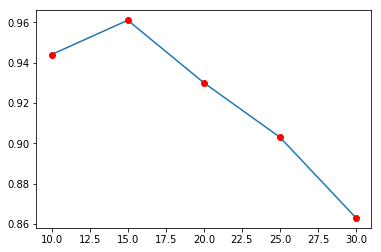

In [102]:
countTrueList = []
for i in range(10, 35, 5):
    countTrue = 0
    for j in range(1000):
        if Check(i):
            countTrue += 1
    countTrueList.append(countTrue / 1000)
print('доля для 10 = ', countTrueList[0])
print('доля для 15 = ', countTrueList[1])
print('доля для 20 = ', countTrueList[2])
print('доля для 25 = ', countTrueList[3])
print('доля для 30 = ', countTrueList[4])
plt.plot([0 + i for i in range(10, 35, 5)], countTrueList)
plt.plot([0 + i for i in range(10, 35, 5)], countTrueList, 'ro')